In [9]:
import matplotlib.pyplot as plt
from freegs.machine import Coil, Solenoid, Machine, Wall
from freegs.jtor import ConstrainBetapIp
from freegs.equilibrium import Equilibrium
from freegs.control import constrain
from freegs import solve
from Geometry import * 

In [10]:
# Global configurations

# Plasma Parameters
Ip = 10e3 # A
B0 = 0.125
poloidal_plasma_beta = 0.05
xpoints = [(0.3, -0.24), (0.3, 0.24)]  # (R,Z) locations of X-points
isoflux = [(0.3, -0.24, 0.3, 0.24)] # (R1,Z1, R2,Z2) pairs


# Central Solenoid
cs_turns = 104 # Turns

# Dimension of coils
wc = 0.05
hc = 0.03

# Position of coils in (R, Z) pairs for coils located at (R, Z) and (R, -Z)
mirrored_PF_coils_positions = [
    (0.22, 0.3),
    (0.40, 0.27),
    (0.52, 0.15)
]

# Simulation Domain
Rmax = 0.7
Rmin = 0.01
Zmax = 0.6
Zmin = -0.6
n = 129           # Number of grid points (must always be in the for

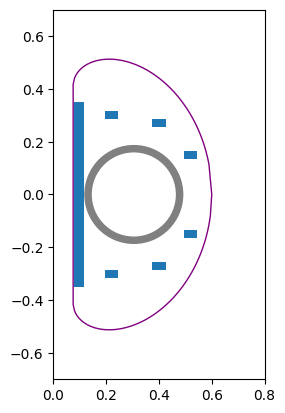

In [11]:
g = Geometry()

for index, (r, z) in enumerate(mirrored_PF_coils_positions):
    g.create_coil(f'PF{index}_U',r, z, wc, hc)
    g.create_coil(f'PF{index}_L',r, -z, wc, hc)

g.plot()

In [12]:
coils = [(name, Coil(prop['r0'], prop['z0'], control=(name != 'CS'))) for name, prop in g.geom['coils'].items()]
RWall, ZWall = list(zip(*g.geom['vv'][0])) 
walls = Wall(RWall, ZWall)

tokamak = Machine(coils, walls)
for coil_name, _ in tokamak.coils:
    if coil_name != 'CS':
        tokamak[coil_name].area = wc * hc
        
eq = Equilibrium(tokamak=tokamak,
                 Rmin=Rmin, Rmax=Rmax,  # Radial domain
                 Zmin=Zmin, Zmax=Zmax,  # Height range
                 nx=n, ny=n  # Number of grid points
                 )

profiles = ConstrainBetapIp(eq,
                            poloidal_plasma_beta,  # Plasma poloidal beta
                            Ip,  # Plasma current [Amps]
                            g.vv_major_radius * B0)  # Vacuum f=R*Bt

constraints = constrain(xpoints=xpoints, isoflux=isoflux)

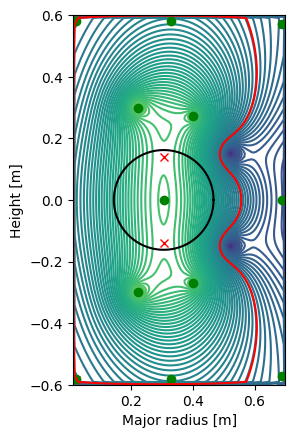

psi_relchange: 0.38438077257335407
bndry_relchange: 1.0
bndry_change: -0.13485689575441862


psi_relchange: 0.06983840199570977
bndry_relchange: 255.201658037531
bndry_change: 0.134330525641175


psi_relchange: 0.022571793265671852
bndry_relchange: 0.04298752353710955
bndry_change: 2.1694744301019525e-05


psi_relchange: 0.016213450612611775
bndry_relchange: 0.001178066879996423
bndry_change: -5.952425728619065e-07


psi_relchange: 0.01423031272702216
bndry_relchange: 0.0022514236985852402
bndry_change: -1.1401451788400387e-06


psi_relchange: 0.012265778926606016
bndry_relchange: 0.0015781464458946457
bndry_change: -8.004535687946299e-07


psi_relchange: 0.01052317414630617
bndry_relchange: 0.0010051880402075525
bndry_change: -5.10355645807082e-07


psi_relchange: 0.00898170667934936
bndry_relchange: 0.0005144974198519824
bndry_change: -2.6135590260089117e-07


psi_relchange: 0.007647388313459104
bndry_relchange: 0.0002066693649688169
bndry_change: -1.0500620943240929e-07


psi_relcha

In [13]:
solve(eq,
      profiles,
      constraints,
      check_limited=True,
      limit_it = 0,
      )

In [31]:
# Print Results
print(
    'Plasma Properties:\n'
    f'\t Plasma Current     {eq.plasmaCurrent():8.2f}\n'
    f'\t Plasma Elongation  {eq.elongation():8.2f}\n'
    f'\t Plasma Triangular  {eq.triangularity():8.2f}\n'
    f'\t Plasma Triangular  {eq.triangularity():8.2f}\n'
    f'\t Plasma Volume      {eq.plasmaVolume():8.2f}\n'
)

print('Current Profile')
for name, coil in eq.tokamak.coils:
    print(f'\t {name}: Current: {coil.current:8.2f} A')

Plasma Properties:
	 Plasma Current     10000.00
	 Plasma Elongation      1.42
	 Plasma Triangular      0.11
	 Plasma Triangular      0.11
	 Plasma Volume          0.11

Current Profile
	 CS: Current:     0.00 A
	 PF0_U: Current:  4015.96 A
	 PF0_L: Current:  4015.96 A
	 PF1_U: Current:  1287.88 A
	 PF1_L: Current:  1287.90 A
	 PF2_U: Current: -3685.56 A
	 PF2_L: Current: -3685.59 A
